In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
# Load file Excel
file_path = r'C:\Users\asus\Documents\habibie\FIS 6\data_permohonan_2023-2025_rev.xlsx'  # Sesuaikan dengan lokasi file
df = pd.read_excel(file_path, sheet_name="2023_2025")


In [33]:
negara_asal_col = df.columns[20] #kolom u
print (negara_asal_col)

UREDI


In [34]:
# Hitung jumlah kemunculan tiap negara
negara_counts = df[negara_asal_col].value_counts().reset_index()
negara_counts.columns = ['Negara Asal', 'Jumlah']

C:\Users\asus\AppData\Local\Temp\ipykernel_19092\2515506838.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




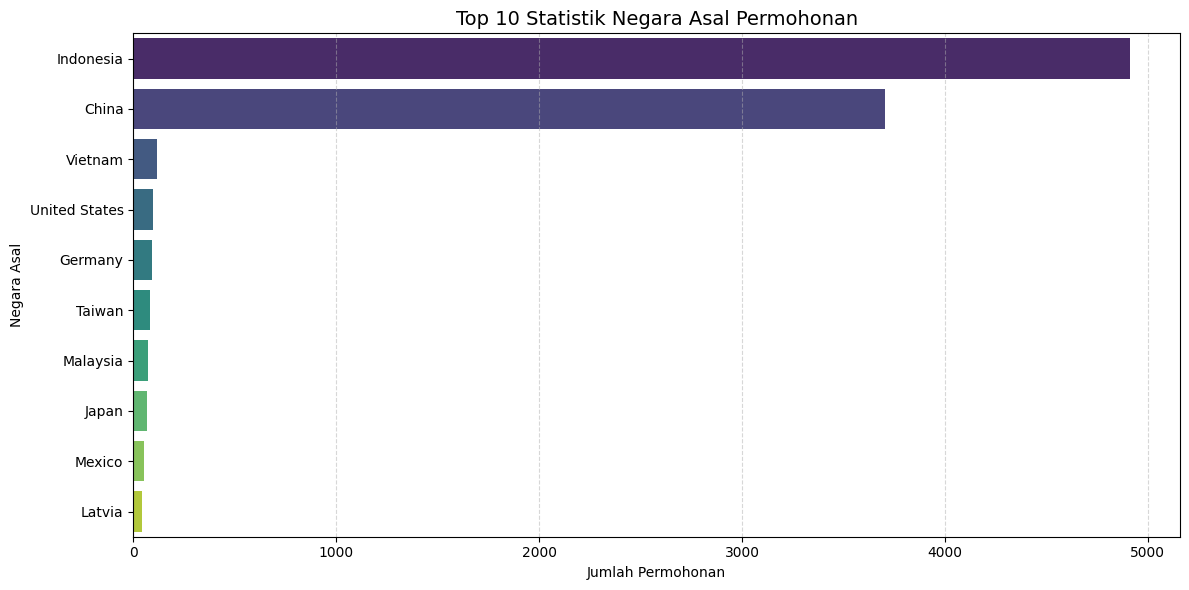

In [35]:
# Ambil 10 negara asal dengan jumlah permohonan terbanyak
top10_negara = negara_counts.sort_values(by='Jumlah', ascending=False).head(10)

# Buat visualisasi bar chart untuk Top 10
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_negara, x='Jumlah', y='Negara Asal', palette='viridis')

plt.title('Top 10 Statistik Negara Asal Permohonan', fontsize=14)
plt.xlabel('Jumlah Permohonan')
plt.ylabel('Negara Asal')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_19092\2468769206.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

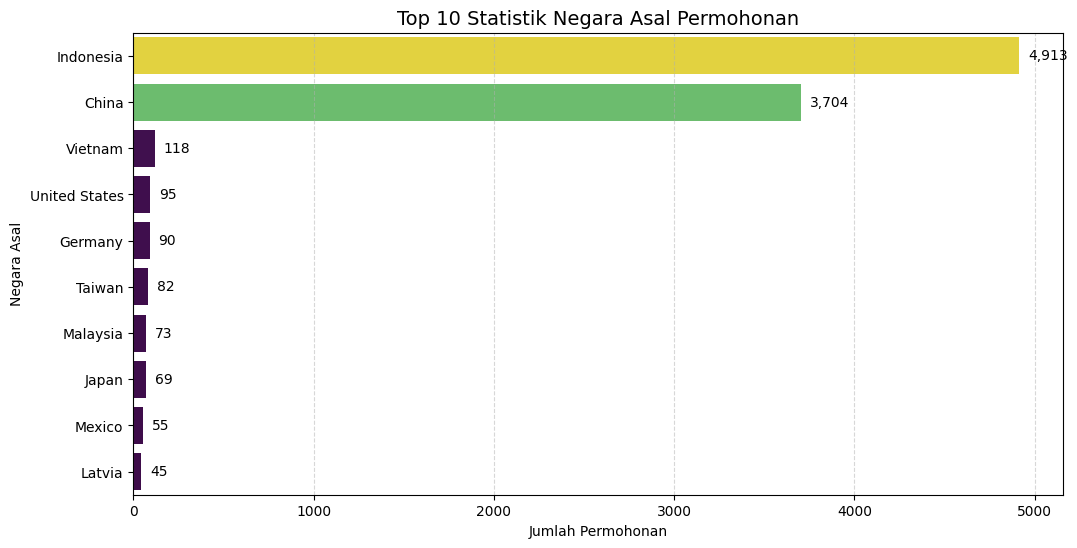

In [20]:

# Ambil Top 10 negara berdasarkan jumlah
top10_negara = negara_counts.sort_values(by='Jumlah', ascending=False).head(10)

# Normalisasi nilai 'Jumlah' untuk colormap
norm = plt.Normalize(top10_negara['Jumlah'].min(), top10_negara['Jumlah'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
colors = [sm.to_rgba(val) for val in top10_negara['Jumlah']]

# Buat plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Jumlah', y='Negara Asal', data=top10_negara, palette=colors)

# Tambahkan label jumlah di ujung tiap bar
for i, (value, name) in enumerate(zip(top10_negara['Jumlah'], top10_negara['Negara Asal'])):
    plt.text(value + max(top10_negara['Jumlah']) * 0.01, i, f'{value:,}', va='center')

# Judul dan label
plt.title('Top 10 Statistik Negara Asal Permohonan', fontsize=14)
plt.xlabel('Jumlah Permohonan')
plt.ylabel('Negara Asal')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Tambahkan colorbar
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Jumlah')

plt.tight_layout()
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_19048\1991497979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=negara_counts, x='Jumlah', y='Negara Asal', palette='viridis')


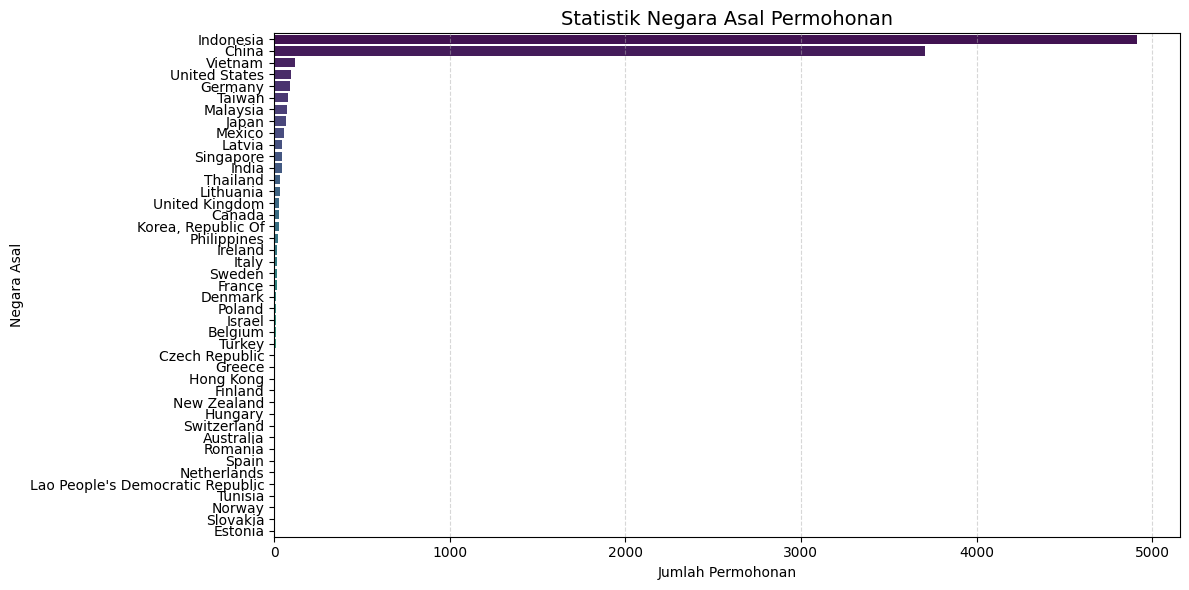

In [5]:
# Buat visualisasi bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=negara_counts, x='Jumlah', y='Negara Asal', palette='viridis')

plt.title('Statistik Negara Asal Permohonan', fontsize=14)
plt.xlabel('Jumlah Permohonan')
plt.ylabel('Negara Asal')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [14]:
import pycountry
import pandas as pd

def get_iso_alpha3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Misal negara_counts adalah DataFrame dengan kolom 'Negara Asal'
negara_counts['ISO_Code'] = negara_counts['Negara Asal'].apply(get_iso_alpha3)

# Drop yang tidak ditemukan kodenya (None)
negara_counts = negara_counts.dropna(subset=['ISO_Code'])

import plotly.express as px

fig = px.choropleth(negara_counts,
                    locations='ISO_Code',
                    color='Jumlah',
                    hover_name='Negara Asal',
                    color_continuous_scale='Viridis',
                    title='Peta Interaktif Jumlah Permohonan per Negara')

fig.show(renderer="browser")



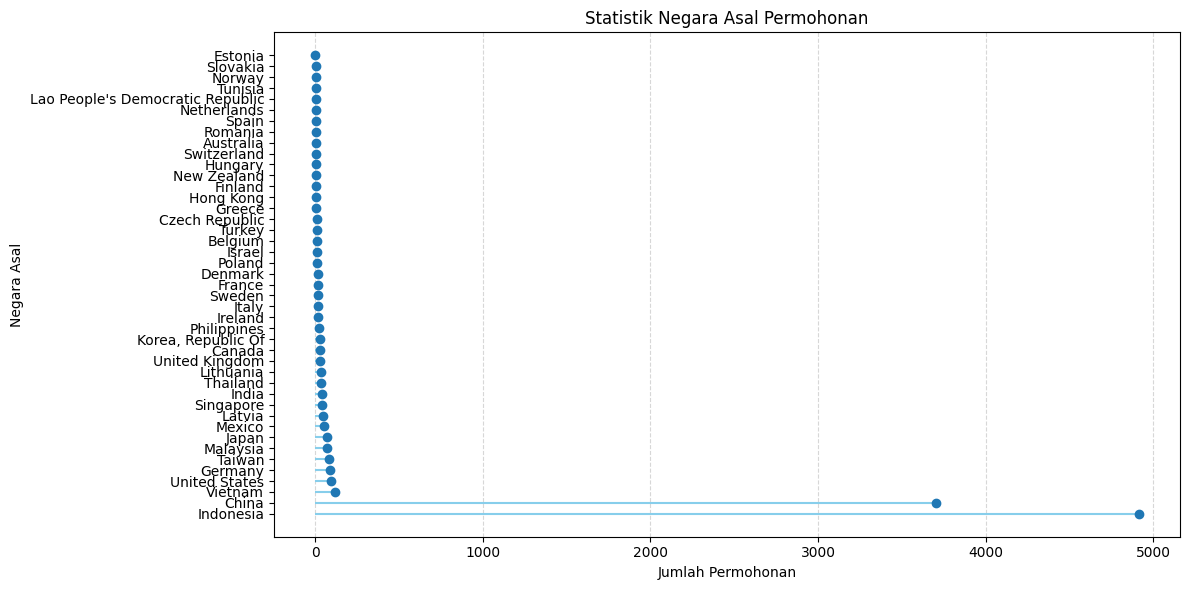

In [36]:
plt.figure(figsize=(12,6))
plt.hlines(y=negara_counts['Negara Asal'], xmin=0, xmax=negara_counts['Jumlah'], color='skyblue')
plt.plot(negara_counts['Jumlah'], negara_counts['Negara Asal'], "o")
plt.title('Statistik Negara Asal Permohonan')
plt.xlabel('Jumlah Permohonan')
plt.ylabel('Negara Asal')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

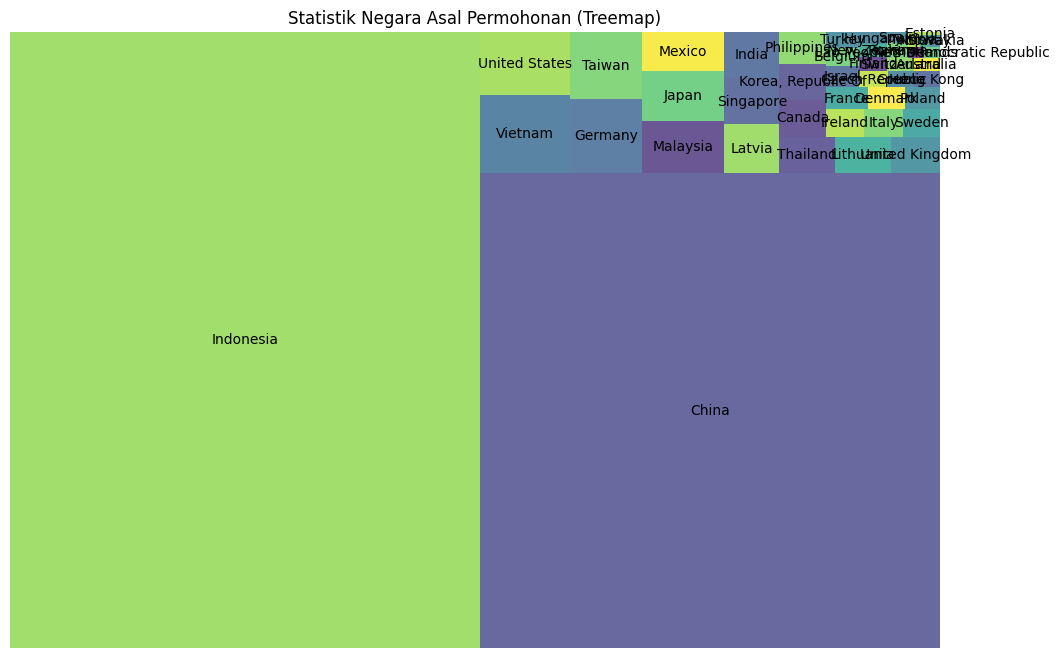

In [37]:
import squarify

plt.figure(figsize=(12, 8))
squarify.plot(sizes=negara_counts['Jumlah'], label=negara_counts['Negara Asal'], alpha=0.8)
plt.axis('off')
plt.title('Statistik Negara Asal Permohonan (Treemap)')
plt.show()

In [126]:
# Ambil kolom tanggal permohonan (misalnya kolom C = indeks ke-2) → sesuaikan kalau beda
tanggal_col = df.columns[9]
print (tanggal_col)

JADWAL_MULAI


In [127]:

# Ubah ke format datetime
df[tanggal_col] = pd.to_datetime(df[tanggal_col], errors='coerce')

C:\Users\asus\AppData\Local\Temp\ipykernel_19092\2717635892.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
df['Tahun'] = df[tanggal_col].dt.year

C:\Users\asus\AppData\Local\Temp\ipykernel_19092\2261251679.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
# Hitung jumlah permohonan per negara per tahun
pivot_data = df.groupby(['Tahun', negara_asal_col]).size().reset_index(name='Jumlah')

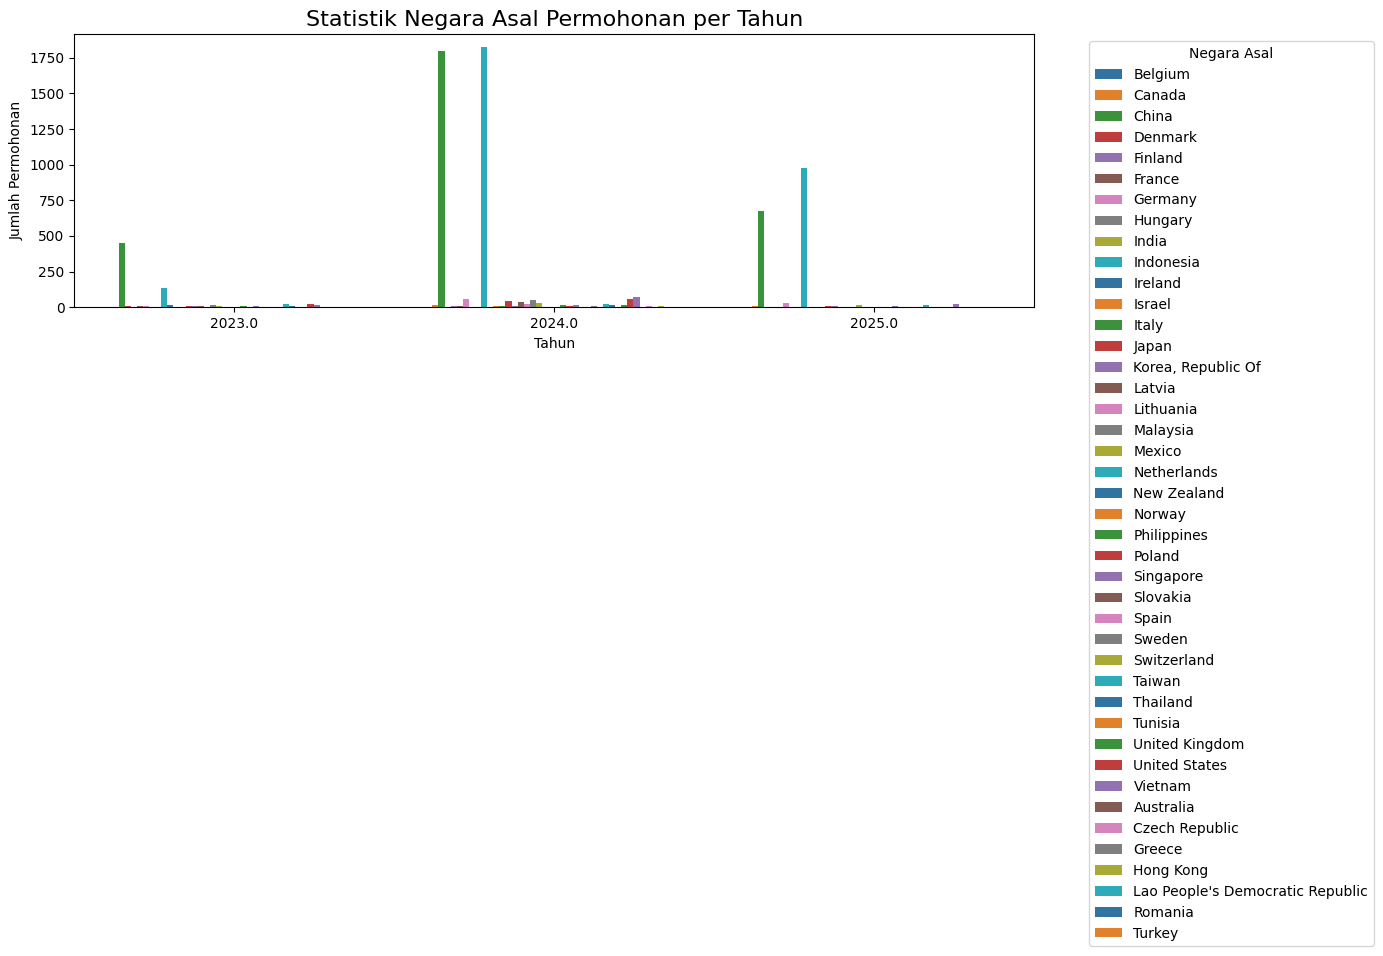

In [41]:
# Buat plot
plt.figure(figsize=(14, 7))
sns.barplot(data=pivot_data, x='Tahun', y='Jumlah', hue=negara_asal_col, palette='tab10')

plt.title('Statistik Negara Asal Permohonan per Tahun', fontsize=16)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Permohonan')
plt.legend(title='Negara Asal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [130]:
# Konversi ke datetime
df[tanggal_col] = pd.to_datetime(df[tanggal_col], errors='coerce')
df['Tahun'] = df[tanggal_col].dt.year

C:\Users\asus\AppData\Local\Temp\ipykernel_19092\135307349.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\asus\AppData\Local\Temp\ipykernel_19092\135307349.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
# Ambil daftar tahun unik
tahun_unik = df['Tahun'].dropna().unique()

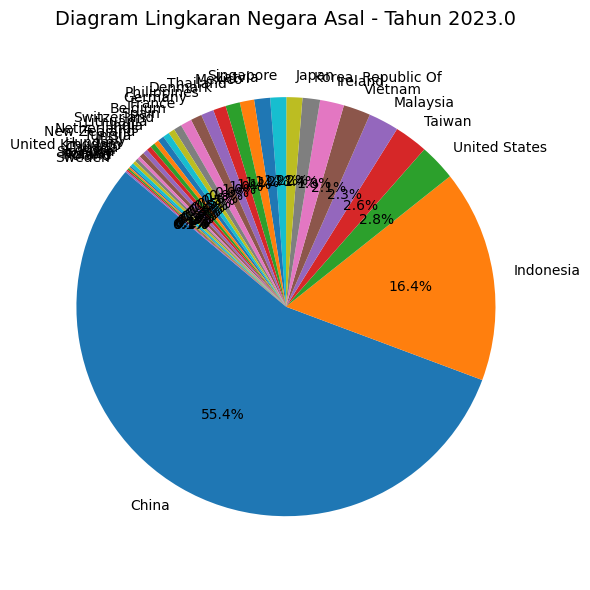

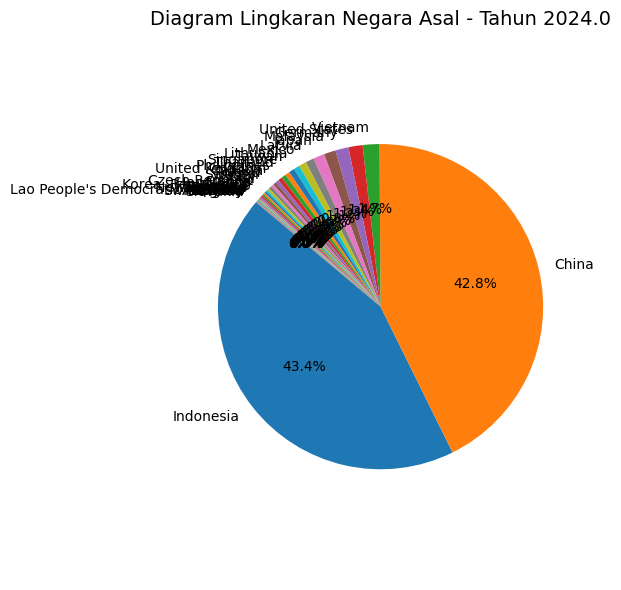

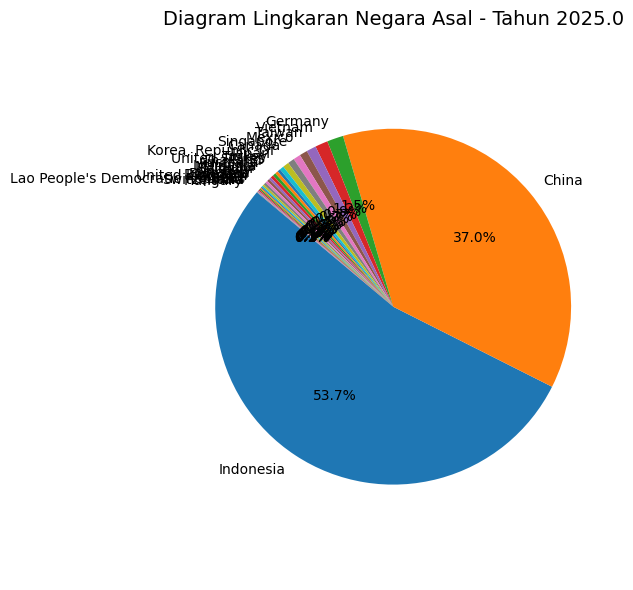

In [49]:
# Buat pie chart untuk setiap tahun
for tahun in sorted(tahun_unik):
    data_tahun = df[df['Tahun'] == tahun]
    negara_counts = data_tahun[negara_asal_col].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(negara_counts, labels=negara_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Diagram Lingkaran Negara Asal - Tahun {tahun}', fontsize=14)
    plt.axis('equal')  # Biar pie-nya bulat sempurna
    plt.tight_layout()
    plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_19092\3516192128.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\asus\AppData\Local\Temp\ipykernel_19092\3516192128.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



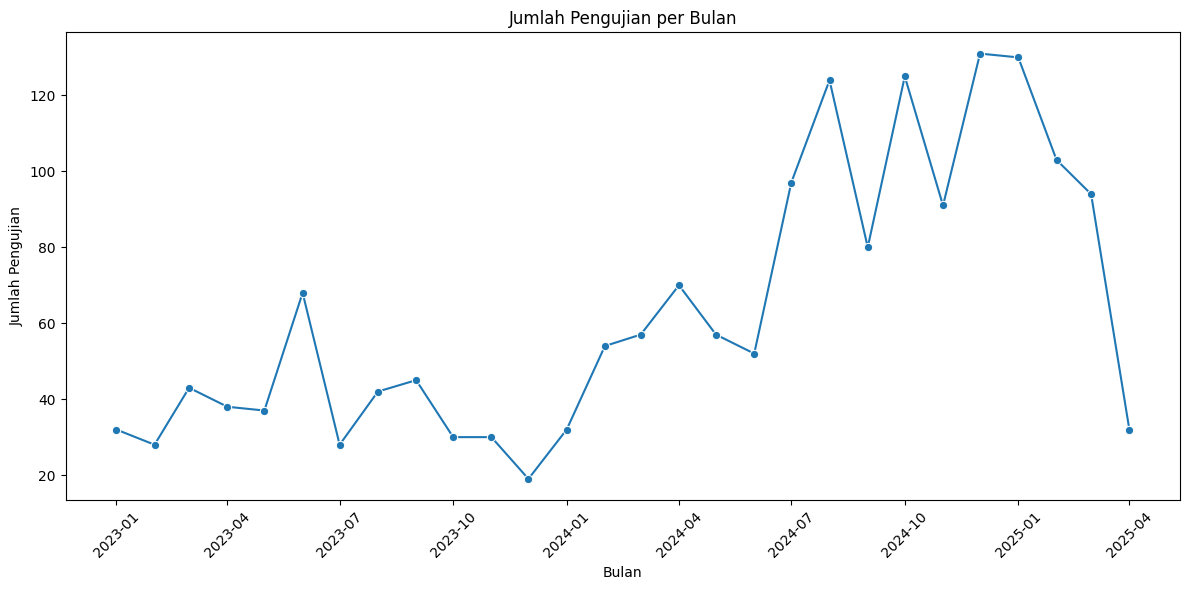

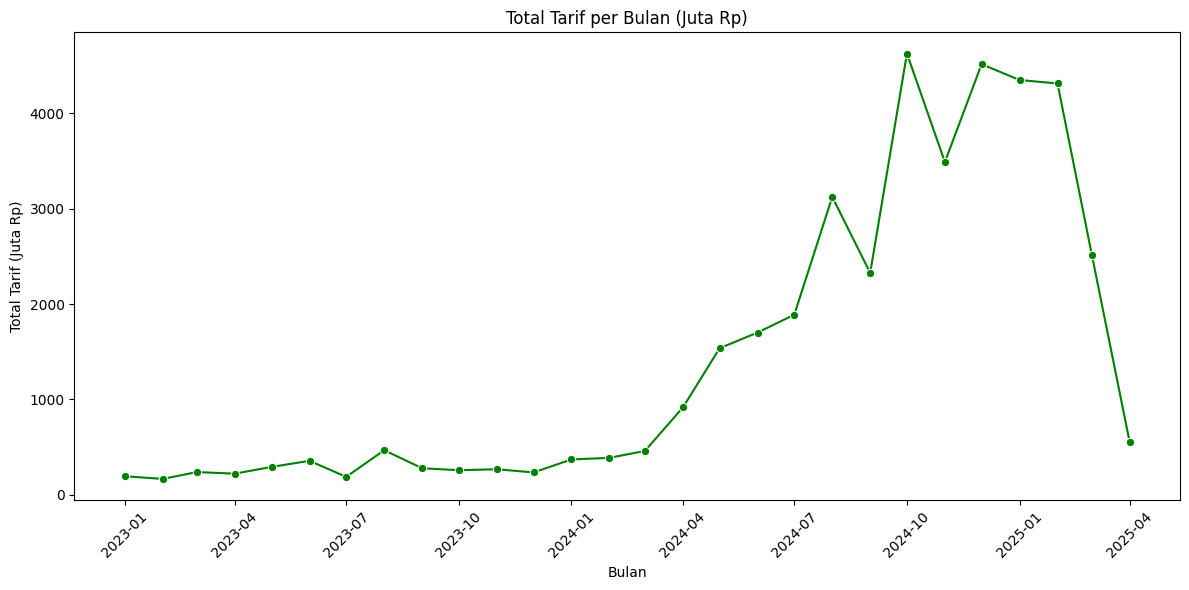

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom JADWAL_MULAI sudah datetime
df['JADWAL_MULAI'] = pd.to_datetime(df['JADWAL_MULAI'], errors='coerce')

# Buat kolom YearMonth dari JADWAL_MULAI
df['YearMonth'] = df['JADWAL_MULAI'].dt.to_period('M')

# Hitung jumlah pengujian per bulan (jumlah RESI_NO unik per bulan)
bulanan = df.groupby('YearMonth').agg({
    'RESI_NO': 'nunique',    # jumlah unik RESI_NO sebagai jumlah pengujian
    'PRICE_REG': 'sum'       # total tarif per bulan
}).reset_index()

# Ubah YearMonth ke datetime untuk plotting
bulanan['YearMonth'] = bulanan['YearMonth'].dt.to_timestamp()

# Plot jumlah pengujian per bulan
plt.figure(figsize=(12, 6))
# barplot = sns.barplot(x='YearMonth', y ='RESI_NO', data=bulanan, palette='viridis')
# for i, (value, name) in enumerate(zip(bulanan['YearMonth'], bulanan['RESI_NO'])):
#     plt.text(value + max (bulanan['YearMonth']) * 0.01, i, f'{value:,}', va='center')
sns.lineplot(data=bulanan, x='YearMonth', y='RESI_NO', marker='o')
plt.title('Jumlah Pengujian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengujian')
# plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# plt.figure(figsize=(12, 6))
# sns.barplot(x='YearMonth', y='RESI_NO', data=bulanan, palette='viridis')
# for i in range(len(bulanan)):
#     plt.text(
#         x=bulanan['YearMonth'][i],
#         y=bulanan['RESI_NO'][i] + 1,
#         s=f"{bulanan['RESI_NO'][i]:,}",
#         ha='center'
#     )
# plt.title('Jumlah Pengujian per Bulan')
# plt.xlabel('Bulan')
# plt.ylabel('Jumlah Pengujian')
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


# Plot total tarif per bulan (dalam juta rupiah)
plt.figure(figsize=(12, 6))
# barplot = sns.barplot(x='YearMonth', y=bulanan['PRICE_REG'], data=bulanan, palette='magma')
# for i, (value, name) in enumerate(zip(bulanan['YearMonth'], bulanan[bulanan['PRICE_REG']])):
#     plt.text(value + max (bulanan['YearMonth']) * 0.01, i, f'{value:,}', va='center')
sns.lineplot(data=bulanan, x='YearMonth', y=bulanan['PRICE_REG'] / 1e6, marker='o', color='green')
plt.title('Total Tarif per Bulan (Juta Rp)')
plt.xlabel('Bulan')
plt.ylabel('Total Tarif (Juta Rp)')
# plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# plt.figure(figsize=(12, 6))
# sns.barplot(x='YearMonth', y='PRICE_REG', data=bulanan, palette='magma')
# for i in range(len(bulanan)):
#     plt.text(
#         x=bulanan['YearMonth'][i],
#         y=bulanan['PRICE_REG'][i] + bulanan['PRICE_REG'].max() * 0.01,
#         s=f"{bulanan['PRICE_REG'][i] / 1e6:,.2f} Jt",
#         ha='center'
#     )
# plt.title('Total Tarif per Bulan (Juta Rp)')
# plt.xlabel('Bulan')
# plt.ylabel('Total Tarif (Juta Rp)')
# from matplotlib.ticker import FuncFormatter

# # Untuk harga dalam juta
# plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:,.0f} Jt'))

# plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()



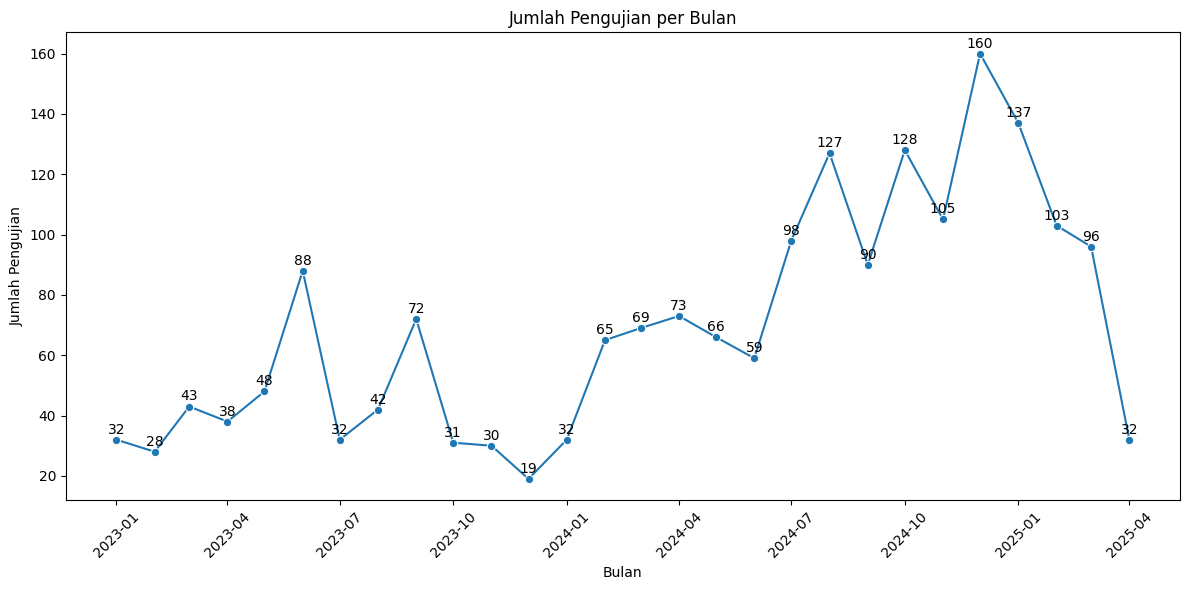

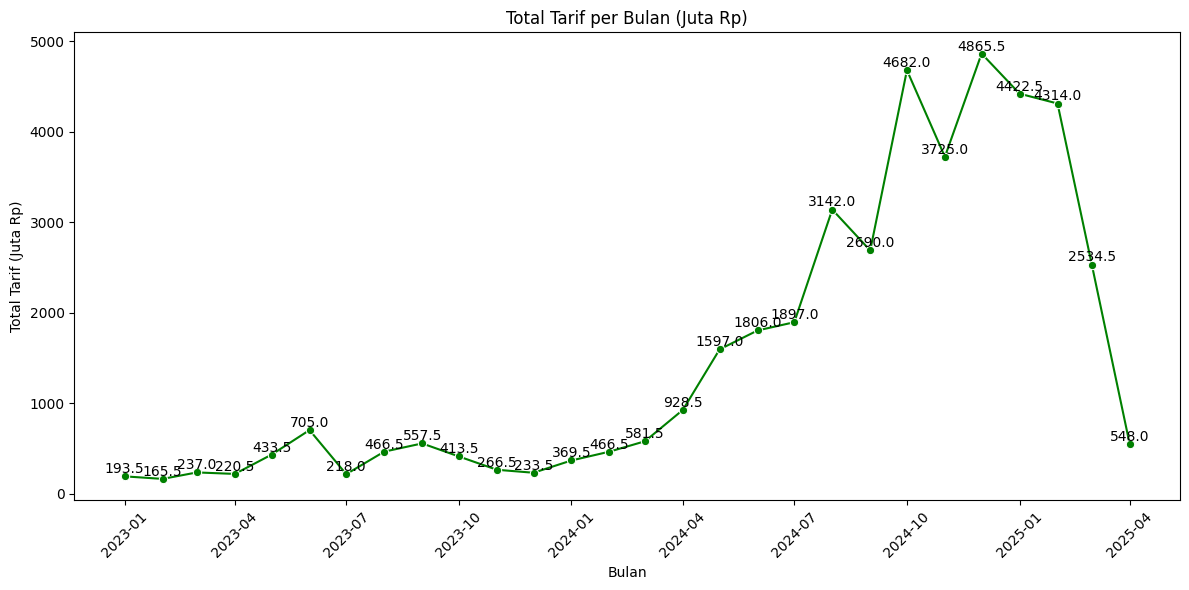

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom JADWAL_MULAI sudah datetime
df['JADWAL_MULAI'] = pd.to_datetime(df['JADWAL_MULAI'], errors='coerce')

# Buat kolom YearMonth dari JADWAL_MULAI
df['YearMonth'] = df['JADWAL_MULAI'].dt.to_period('M')

# Hitung jumlah pengujian per bulan (jumlah RESI_NO unik per bulan)
bulanan = df.groupby('YearMonth').agg({
    'RESI_NO': 'nunique',    # jumlah unik RESI_NO sebagai jumlah pengujian
    'PRICE_REG': 'sum'       # total tarif per bulan
}).reset_index()

# Ubah YearMonth ke datetime untuk plotting
bulanan['YearMonth'] = bulanan['YearMonth'].dt.to_timestamp()

# Plot 1: Jumlah Pengujian per Bulan
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(data=bulanan, x='YearMonth', y='RESI_NO', marker='o')
plt.title('Jumlah Pengujian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengujian')
plt.xticks(rotation=45)

# Tambahkan label di atas setiap titik
for x, y in zip(bulanan['YearMonth'], bulanan['RESI_NO']):
    ax1.text(x, y + 1, f'{y}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot 2: Total Tarif per Bulan (dalam juta rupiah)
plt.figure(figsize=(12, 6))
ax2 = sns.lineplot(data=bulanan, x='YearMonth', y=bulanan['PRICE_REG'] / 1e6, marker='o', color='green')
plt.title('Total Tarif per Bulan (Juta Rp)')
plt.xlabel('Bulan')
plt.ylabel('Total Tarif (Juta Rp)')
plt.xticks(rotation=45)

# Tambahkan label di atas setiap titik
for x, y in zip(bulanan['YearMonth'], bulanan['PRICE_REG'] / 1e6):
    ax2.text(x, y + 1, f'{y:.1f}', ha='center', va='bottom')  # dibulatkan ke 1 desimal

plt.tight_layout()
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_9608\4055601545.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_jumlah_uji, y="FULLNAME", x="Jumlah_Uji", palette="Blues_d")


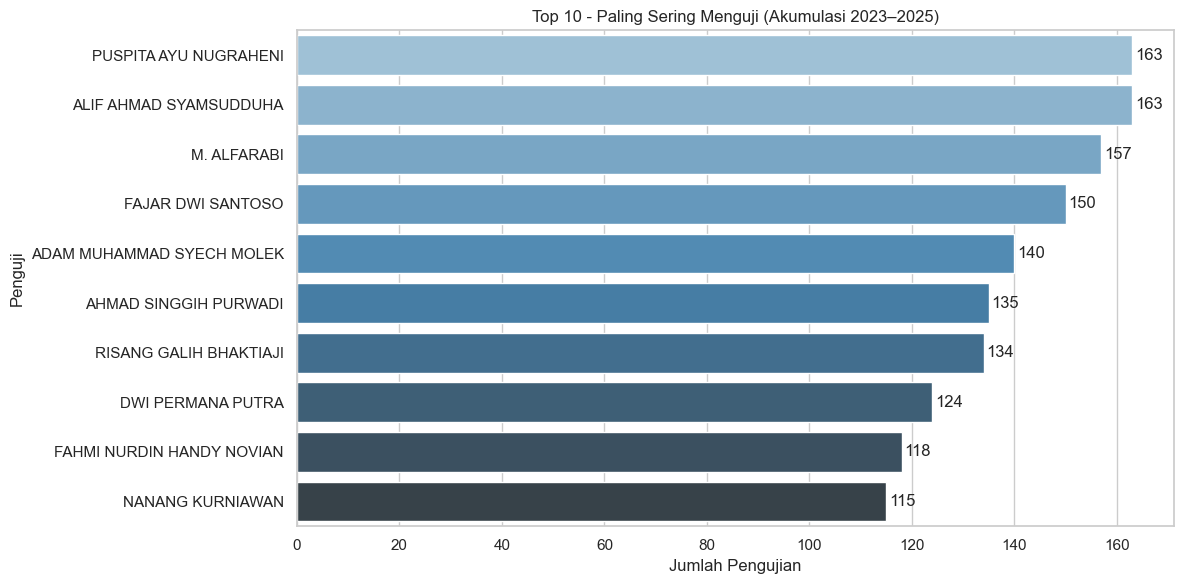

In [ ]:
# # Fungsi bantu untuk menambahkan label pada bar
# def add_labels(ax):
#     for p in ax.patches:
#         width = p.get_width()
#         ax.text(width + 0.5,
#                 p.get_y() + p.get_height() / 2,
#                 f'{width:.0f}',
#                 va='center')

# # Filter data untuk tahun 2023, 2024, dan 2025
# eqp_3years = eqp_group_stats[eqp_group_stats["TAHUN"].isin([2023, 2024, 2025])]

# # Akumulasi frekuensi berdasarkan FITUR_GROUP
# accumulated_eqp = eqp_3years.groupby("FULLNAME")["Frekuensi"].sum().reset_index()

# # Ambil Top 10 FITUR_GROUP berdasarkan frekuensi tertinggi (akumulasi 3 tahun)
# top10_jumlah_uji = accumulated_eqp.sort_values(by="Frekuensi", ascending=False).head(10)

# # Plot
# # 3. Top 10 - Paling Sering Menguji
# plt.figure()
# sns.barplot(data=top10_jumlah_uji, y="FULLNAME", x="Frekuensi", palette="Blues_d")
# plt.title("Top 10 - Paling Sering Menguji")
# plt.xlabel("Jumlah Pengujian")
# plt.ylabel("Penguji")
# plt.tight_layout()
# plt.savefig("top10_jumlah_uji.png")

# Fungsi bantu untuk menambahkan label pada bar
def add_labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5,
                p.get_y() + p.get_height() / 2,
                f'{width:.0f}',
                va='center')

# Buat dataframe jumlah pengujian per tahun dan nama
fullname_per_tahun = combined_data.groupby(['TAHUN', 'FULLNAME']).size().reset_index(name='Jumlah_Uji')

# Akumulasi jumlah pengujian selama 2023–2025 berdasarkan FULLNAME
fullname_akumulasi = fullname_per_tahun.groupby('FULLNAME')['Jumlah_Uji'].sum().reset_index()

# Ambil Top 10
top10_jumlah_uji = fullname_akumulasi.sort_values(by="Jumlah_Uji", ascending=False).head(10)

# Plot Top 10
plt.figure()
ax = sns.barplot(data=top10_jumlah_uji, y="FULLNAME", x="Jumlah_Uji", palette="Blues_d")
plt.title("Top 10 - Paling Sering Menguji (Akumulasi 2023–2025)")
plt.xlabel("Jumlah Pengujian")
plt.ylabel("Penguji")
add_labels(ax)
plt.tight_layout()
plt.savefig("top10_jumlah_uji.png")



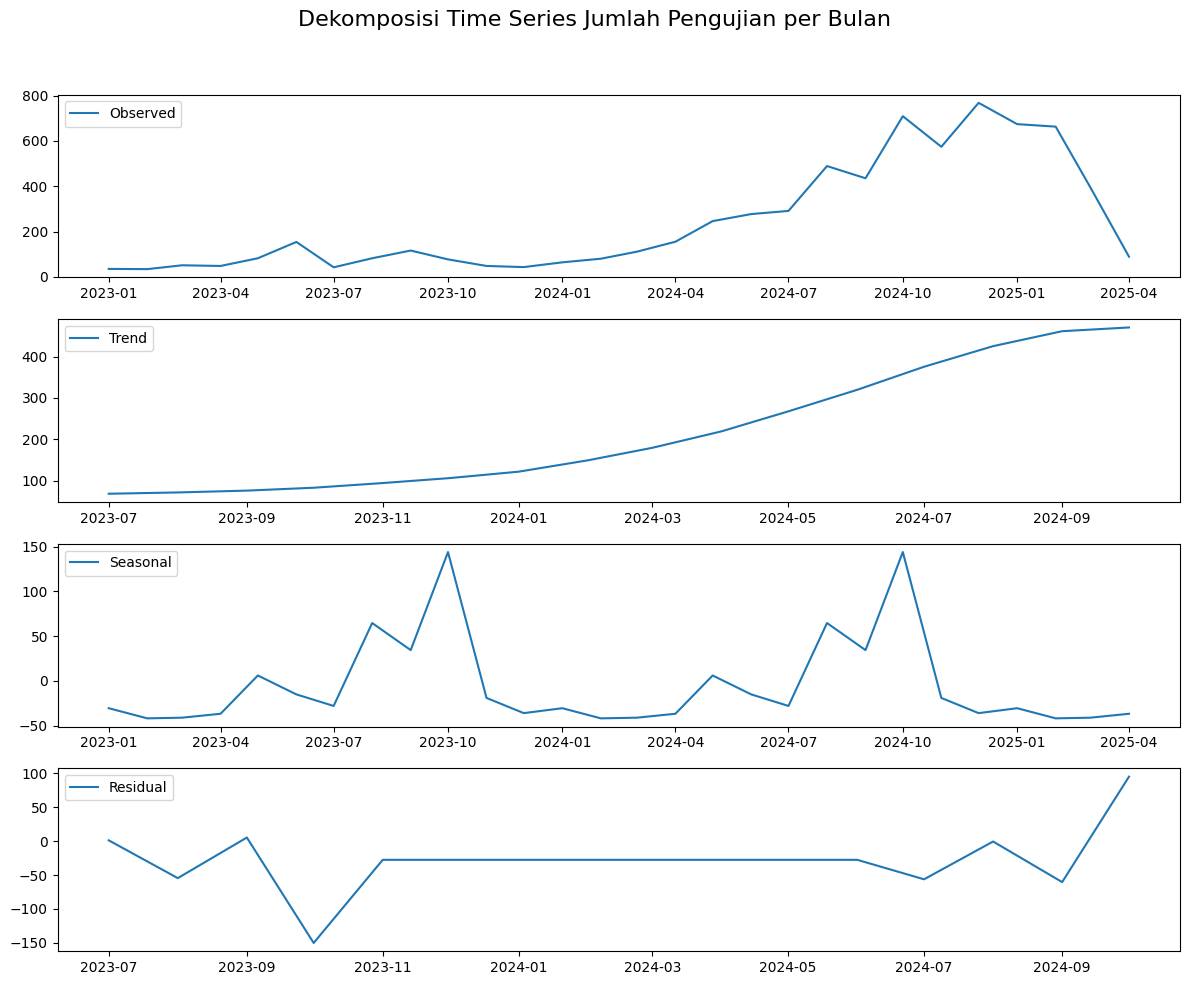

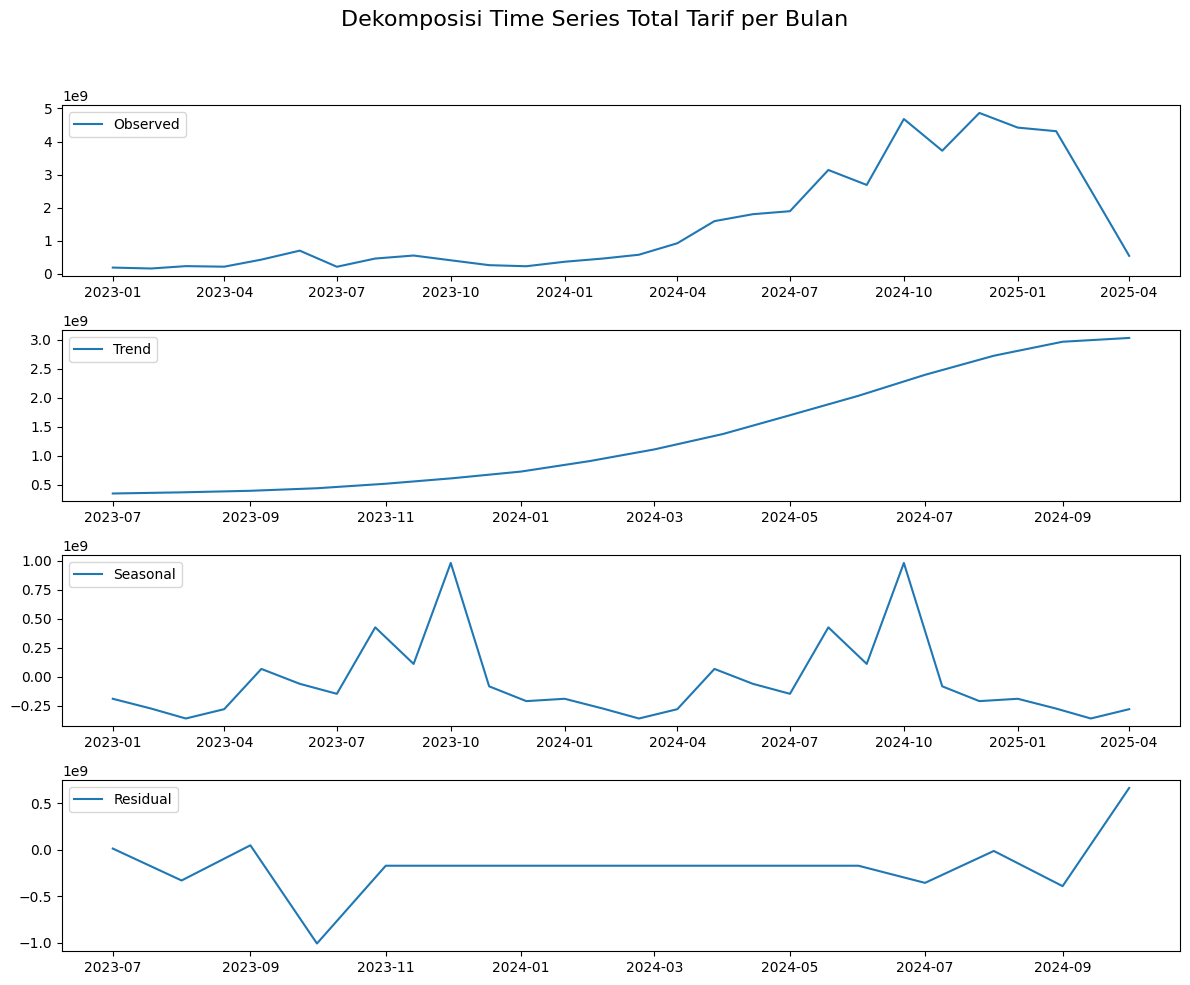

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- 1. Load dan siapkan data ---
# Misal data sudah ada di df dengan kolom 'JADWAL_MULAI', 'RESI_NO', dan 'PRICE_REG' (tarif)

# Pastikan 'JADWAL_MULAI' bertipe datetime
df['JADWAL_MULAI'] = pd.to_datetime(df['JADWAL_MULAI'], errors='coerce')

# Buat kolom YearMonth untuk agregasi bulanan
df['YearMonth'] = df['JADWAL_MULAI'].dt.to_period('M')

# --- 2. Agregasi per bulan ---
bulanan = df.groupby('YearMonth').agg({
    'RESI_NO': 'count',    # Hitung jumlah pengujian (jumlah resi)
    'PRICE_REG': 'sum'     # Total tarif per bulan
}).reset_index()

# Rename kolom supaya jelas
bulanan.rename(columns={'RESI_NO': 'Jumlah_Uji', 'PRICE_REG': 'Total_Tarif'}, inplace=True)

# Konversi YearMonth ke datetime (timestamp) untuk analisis time series
bulanan['YearMonth'] = bulanan['YearMonth'].dt.to_timestamp()

# Set index ke YearMonth
bulanan.set_index('YearMonth', inplace=True)

# --- 3. Dekomposisi time series ---

# Dekomposisi Jumlah Pengujian
result_jumlah = seasonal_decompose(bulanan['Jumlah_Uji'], model='additive', period=12)

plt.figure(figsize=(12, 10))
plt.suptitle('Dekomposisi Time Series Jumlah Pengujian per Bulan', fontsize=16)

plt.subplot(411)
plt.plot(result_jumlah.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result_jumlah.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result_jumlah.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result_jumlah.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Dekomposisi Total Tarif
result_tarif = seasonal_decompose(bulanan['Total_Tarif'], model='additive', period=12)

plt.figure(figsize=(12, 10))
plt.suptitle('Dekomposisi Time Series Total Tarif per Bulan', fontsize=16)

plt.subplot(411)
plt.plot(result_tarif.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result_tarif.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result_tarif.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result_tarif.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [102]:
print(bulanan.columns)


Index(['RESI_NO', 'PRICE_REG'], dtype='object')


In [ ]:
df['RESI_NO'] = pd.to_numeric(df['RESI_NO'], errors='coerce') #Jika tipe data bukan numerik (misal object karena ada string), ubah dulu ke numerik:


In [114]:
print(df['RESI_NO'].isna().sum())


540


In [121]:
df = df.dropna(subset=['RESI_NO'])

In [122]:
df['RESI_NO'] = df['RESI_NO'].fillna(0)

C:\Users\asus\AppData\Local\Temp\ipykernel_19092\171147372.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
bulanan = df.groupby('YearMonth').agg({'RESI_NO':'sum'}).reset_index()


In [120]:
# Tampilkan baris yang bikin error (nilai RESI_NO bukan angka)
print(df[df['RESI_NO'].isna()][['JADWAL_MULAI', 'RESI_NO']].head(10))

           JADWAL_MULAI  RESI_NO
247 2023-07-17 08:38:00      NaN
248 2023-06-05 10:40:00      NaN
249 2023-05-25 09:00:00      NaN
250 2023-05-26 10:54:00      NaN
251 2023-05-26 10:54:00      NaN
252 2023-05-26 10:54:00      NaN
253 2023-05-26 10:54:00      NaN
254 2023-05-26 10:54:00      NaN
255 2023-05-26 10:54:00      NaN
256 2023-05-26 10:54:00      NaN


C:\Users\asus\AppData\Local\Temp\ipykernel_19092\2145729782.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\asus\AppData\Local\Temp\ipykernel_19092\2145729782.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



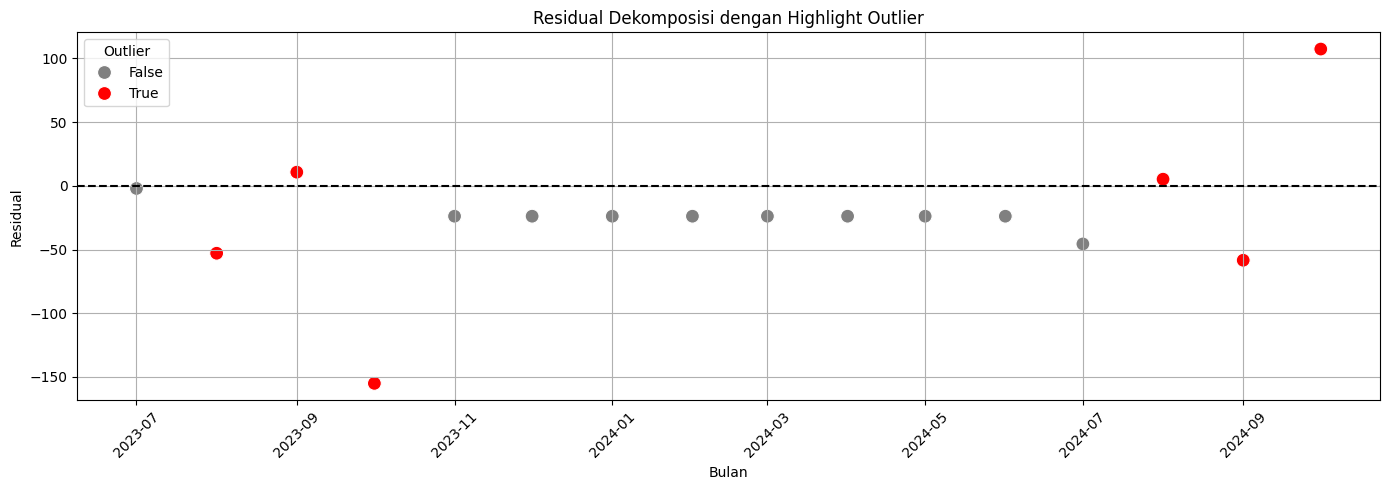

    YearMonth    Residual  Outlier
7  2023-08-01  -52.868056     True
8  2023-09-01   10.756944     True
9  2023-10-01 -154.993056     True
19 2024-08-01    5.256944     True
20 2024-09-01  -58.368056     True
21 2024-10-01  107.381944     True


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Pastikan 'JADWAL_MULAI' bertipe datetime
df['JADWAL_MULAI'] = pd.to_datetime(df['JADWAL_MULAI'], errors='coerce')

# Buat kolom YearMonth (tipe period 'M' cukup, bisa diubah ke timestamp kalau perlu)
df['YearMonth'] = df['JADWAL_MULAI'].dt.to_period('M')

# Agregasi data bulanan, misal hitung jumlah RESI_NO per bulan
bulanan = df.groupby('YearMonth').agg({'RESI_NO':'count'}).reset_index()

# Ubah YearMonth jadi datetime (timestamp) agar mudah di set index dan plot
bulanan['YearMonth'] = bulanan['YearMonth'].dt.to_timestamp()

# Set YearMonth sebagai index
bulanan.set_index('YearMonth', inplace=True)

# Lakukan dekomposisi (model aditif, periode 12 untuk data bulanan)
dekomposisi = seasonal_decompose(bulanan['RESI_NO'], model='additive', period=12)

# Ambil residual dan reset index supaya YearMonth jadi kolom lagi
residual_df = dekomposisi.resid.reset_index()
residual_df.columns = ['YearMonth', 'Residual']

# Drop missing values hasil dekomposisi
residual_df = residual_df.dropna()

# Hitung IQR untuk deteksi outlier
Q1 = residual_df['Residual'].quantile(0.25)
Q3 = residual_df['Residual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tandai outlier
residual_df['Outlier'] = (residual_df['Residual'] < lower_bound) | (residual_df['Residual'] > upper_bound)

# Plot residual dan highlight outlier
plt.figure(figsize=(14, 5))
sns.scatterplot(data=residual_df, x='YearMonth', y='Residual', hue='Outlier', 
                palette={False: 'gray', True: 'red'}, s=100)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residual Dekomposisi dengan Highlight Outlier')
plt.xlabel('Bulan')
plt.ylabel('Residual')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Tampilkan data outlier
print(residual_df[residual_df['Outlier']])


In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Pastikan index adalah datetime
bulanan.set_index('YearMonth', inplace=True)

# Lakukan dekomposisi (dengan model aditif)
dekomposisi = seasonal_decompose(bulanan['RESI_NO'], model='additive', period=12)

# Ambil residual
residual = dekomposisi.resid
# Buat DataFrame residual
residual_df = pd.DataFrame({
    'YearMonth': bulanan['YearMonth'],
    'Residual': residual
}).dropna()

# Hitung IQR untuk deteksi outlier
Q1 = residual_df['Residual'].quantile(0.25)
Q3 = residual_df['Residual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tandai outlier
residual_df['Outlier'] = (residual_df['Residual'] < lower_bound) | (residual_df['Residual'] > upper_bound)

# Plot residual dan highlight outlier
plt.figure(figsize=(14, 5))
sns.scatterplot(data=residual_df, x='YearMonth', y='Residual', hue='Outlier', palette={False: 'gray', True: 'red'}, s=100)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residual Dekomposisi dengan Highlight Outlier')
plt.xlabel('Bulan')
plt.ylabel('Residual')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Tampilkan data outlier
print(residual_df[residual_df['Outlier']])


KeyError: "None of ['YearMonth'] are in the columns"

In [31]:
print(bulanan.columns)

Index(['Jumlah_Uji', 'Total_Tarif'], dtype='object')


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Pastikan kolom waktu dan index sudah benar
bulanan['YearMonth'] = pd.to_datetime(bulanan['YearMonth'])
bulanan.set_index('YearMonth', inplace=True)

# Gunakan kolom RESI_NO untuk jumlah pengujian
data = bulanan['RESI_NO']

# Buat model SARIMA — parameter bisa di-tuning
model = SARIMAX(data, 
                order=(1, 1, 1),              # p, d, q
                seasonal_order=(1, 1, 1, 12), # P, D, Q, S (S = 12 untuk musiman bulanan)
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit model
model_fit = model.fit(disp=False)

# Forecast 6 bulan ke depan
forecast = model_fit.forecast(steps=6)

# Buat DataFrame gabungan (historis + prediksi)
predicted = pd.concat([data, forecast])

# Plot hasil
plt.figure(figsize=(12,6))
plt.plot(data, label='Data Historis')
plt.plot(forecast, label='Forecast 6 Bulan ke Depan', linestyle='--', color='orange')
plt.title('Forecasting Jumlah Pengujian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengujian')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Tampilkan hasil forecast
print("Hasil Forecast Jumlah Pengujian 6 Bulan ke Depan:")
print(forecast)


KeyError: 'YearMonth'